In [1]:
library('igraph')



Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'infotheo'


The following objects are masked from 'package:entropy':

    discretize, entropy




# QUESTION 18: How many personal networks are there?
Create directed personal networks for useres who have more than 2 circles

In [2]:
#read network files
files_circle=list.files(path='gplus',pattern='*.circles')
cnt=0
for (file in files_circle){
    path=paste('gplus',file,sep='/')
    circle=readLines(path)
    if(length(circle)>2){
        cnt=cnt+1
    }
}
cat('The number of personal networks with more than 2 circles is ',cnt,'\n')
cat('The total number of personal networks is ',length(files_circle),'\n')

The number of personal networks with more than 2 circles is  57 
The total number of personal networks is  132 


# QUESTION 19: For the 3 personal networks (node ID given below), plot the in-degree and out- degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution? In this question, you should have 6 plots.

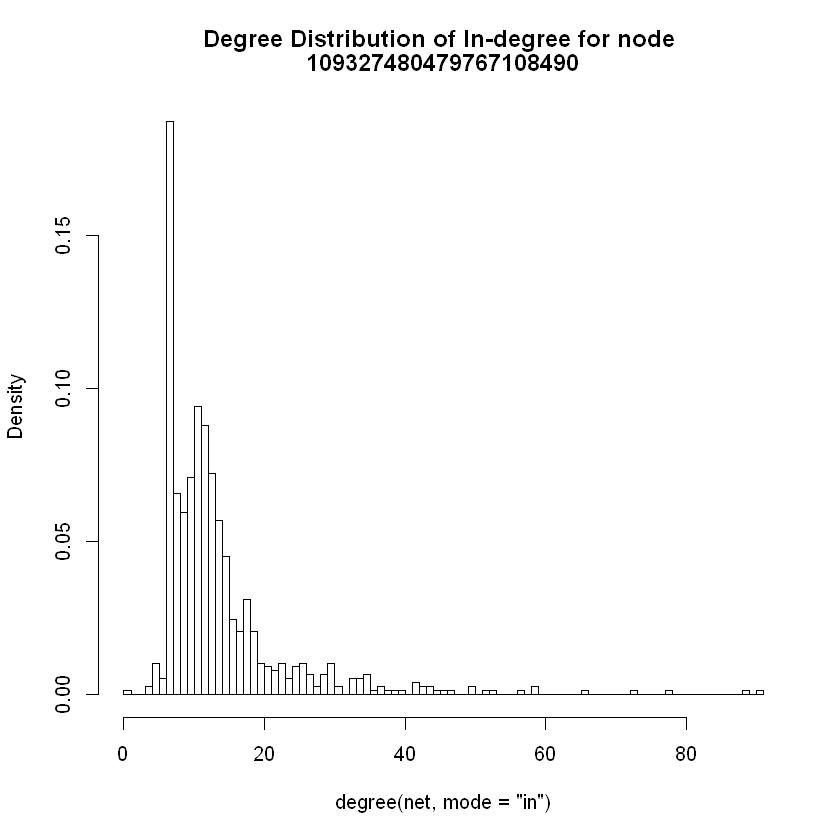

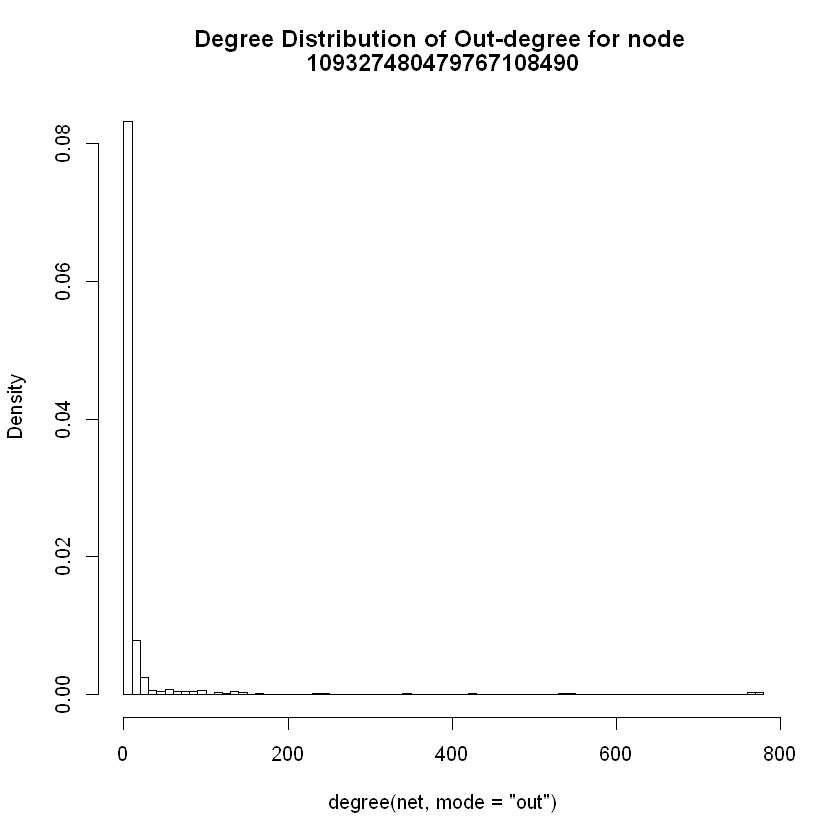

In [3]:
node=c('109327480479767108490')
#,'115625564993990145546','101373961279443806744')
    path=paste('gplus','/',node,'.edges',sep='')
    net=read_graph(path,format='ncol',directed=TRUE)
    #append ego node
    net=add_vertices(net,nv=1,name=node)
    #link each original node with ego node
    L=vcount(net)
    for (i in seq(1,L-1,1)){
        net=add_edges(net,edges=c(L,i))
        #cat('step ',i,'\n')
    }
    #plot in-degree distribution
    hist(degree(net,mode='in'),breaks=100,freq=FALSE,main=c('Degree Distribution of In-degree for node ',node))
    #plot out-degree distribution
    hist(degree(net,mode='out'),breaks=100,freq=FALSE,main=c('Degree Distribution of Out-degree for node ',node))


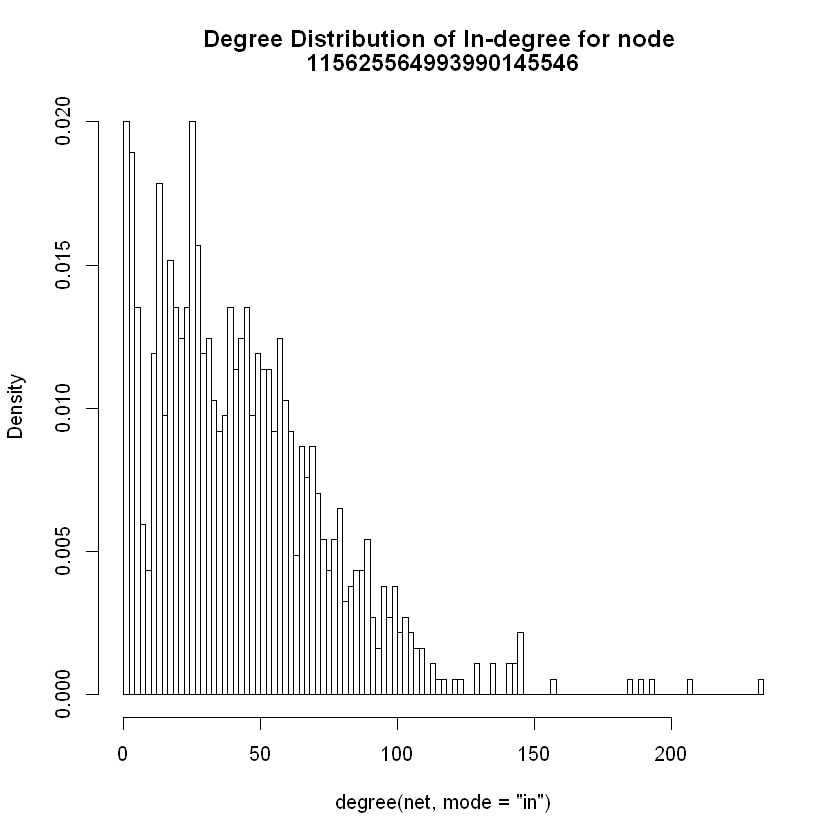

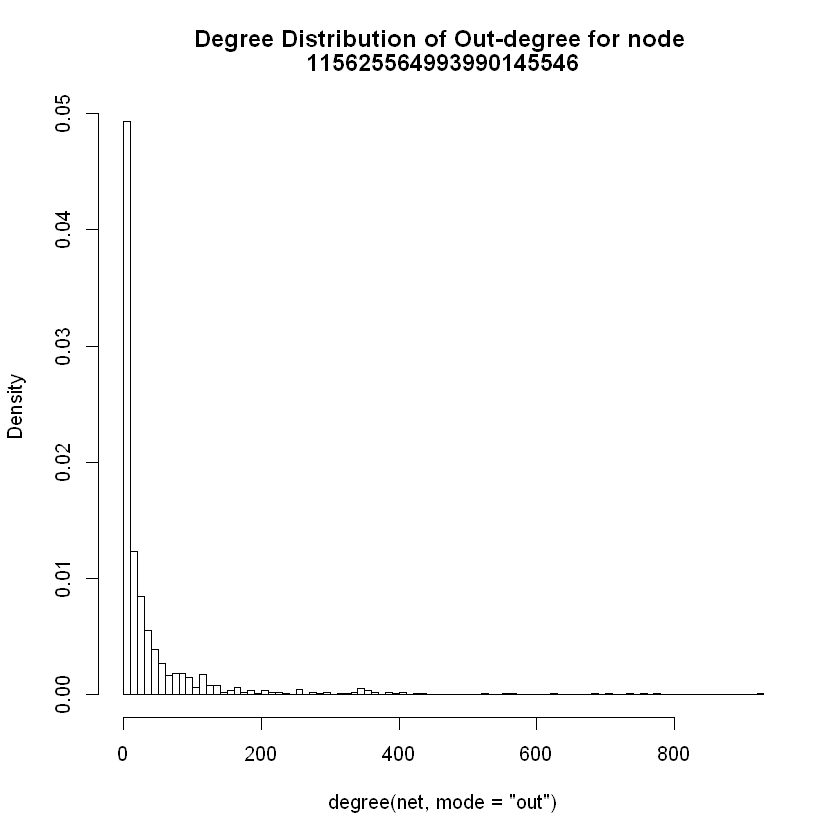

In [4]:
node=c('115625564993990145546')
#,'115625564993990145546','101373961279443806744')
    path=paste('gplus','/',node,'.edges',sep='')
    net=read_graph(path,format='ncol',directed=TRUE)
    #append ego node
    net=add_vertices(net,nv=1,name=node)
    #link each original node with ego node
    L=vcount(net)
    for (i in seq(1,L-1,1)){
        net=add_edges(net,edges=c(L,i))
        #cat('step ',i,'\n')
    }
    #plot in-degree distribution
    hist(degree(net,mode='in'),breaks=100,freq=FALSE,main=c('Degree Distribution of In-degree for node ',node))
    #plot out-degree distribution
    hist(degree(net,mode='out'),breaks=100,freq=FALSE,main=c('Degree Distribution of Out-degree for node ',node))


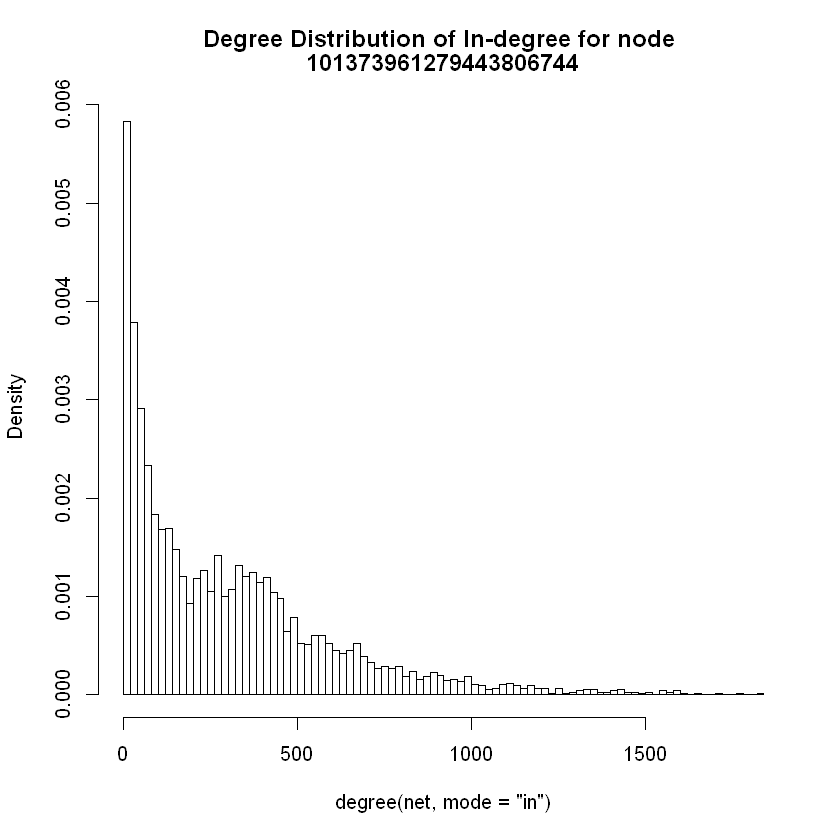

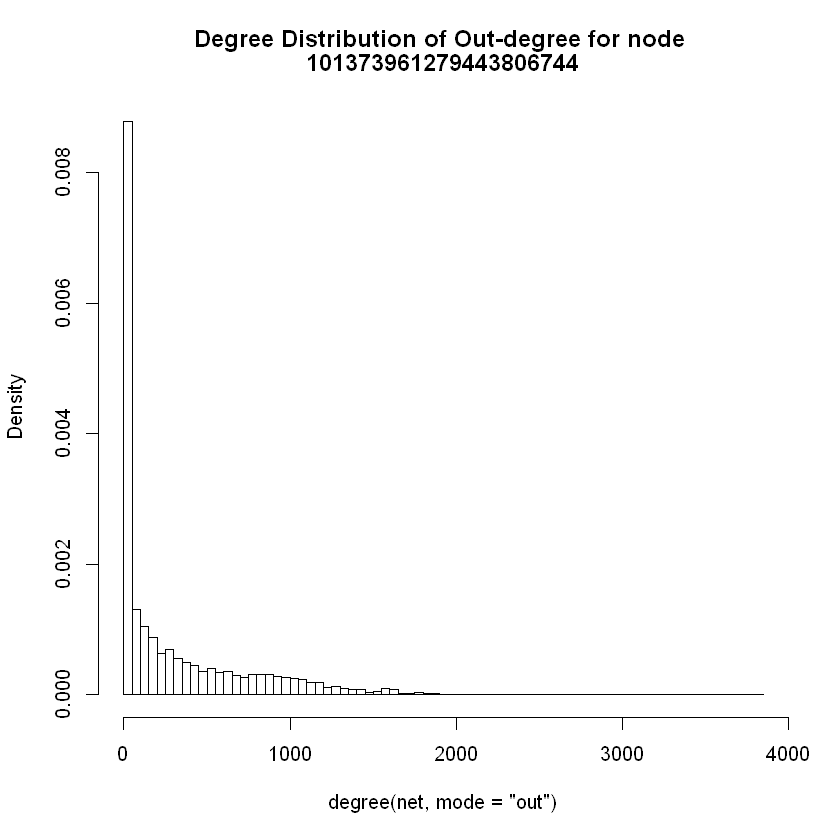

In [102]:
node=c('101373961279443806744')#this node has too large size
#,'115625564993990145546','101373961279443806744')
    path=paste('gplus','/',node,'.edges',sep='')
    net=read_graph(path,format='ncol',directed=TRUE)
    #append ego node
    net=add_vertices(net,nv=1,name=node)
    #link each original node with ego node
    L=vcount(net)
    for (i in seq(1,L-1,1)){
        net=add_edges(net,edges=c(L,i))
        #cat('step ',i,'\n')
    }
    #plot in-degree distribution
    hist(degree(net,mode='in'),breaks=100,freq=FALSE,main=c('Degree Distribution of In-degree for node ',node))
    #plot out-degree distribution
    hist(degree(net,mode='out'),breaks=100,freq=FALSE,main=c('Degree Distribution of Out-degree for node ',node))


# QUESTION 20: For the 3 personal networks picked in Question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots.

In [103]:
nodes_id=c('109327480479767108490','115625564993990145546','101373961279443806744')
#,'101373961279443806744'
for (node in nodes_id){
    path=paste('gplus','/',node,'.edges',sep='')
    net=read_graph(path,format='ncol',directed=TRUE)
    #append ego node
    net=add_vertices(net,nv=1,name=node)
    #link each original node with ego node
    L=vcount(net)
    for (i in seq(1,L-1,1)){
        net=add_edges(net,edges=c(L,i))
        }
    community=cluster_walktrap(net)
    cat('The modularity of node ',node, ' is ',modularity(community),'\n')
    #plot(community,net,edge.arrow.size=.1,vertex.size=3,vertex.label=NA,edge.color='darkgray',main=c('Community Structure for Node ',node))
}

The modularity of node  109327480479767108490  is  0.2527654 
The modularity of node  115625564993990145546  is  0.3194726 
The modularity of node  101373961279443806744  is  0.1910903 


# QUESTION 21: Based on the expression for h and c, explain the meaning of homogeneity and completeness in words.

# QUESTION 22: Compute the h and c values for the community structures of the 3 personal network (same nodes as Question 19). Interpret the values and provide a detailed explanation. Are there negative values? Why?

In [104]:
#define entropy function
#the input is a set of circles C={C1,C2,C3,.....} 
#and the total number of people with circle information N
entropy=function(vector, N){
    H=0
    for (i in 1:length(vector)){
        if(vector[i]!=0){
            H=H-(vector[i]/N*log2(vector[i]/N))
        }
    }
    return(H)
}

#define conditional entropy function
#the input K(vector,cond) is the set of communities, 
#A(vector_obser) is the number of people belonging to community j and circle i
condition_entropy_1=function(mat_inter,vector_cond,N){
    cond_H=0
    for (j in 1:length(vector_cond)){
        for (i in 1:dim(mat_inter)[2]){
            if (mat_inter[j,i]!=0 && vector_cond[j]!=0){
                cond_H=cond_H-(mat_inter[j,i]/N*log2(mat_inter[j,i]/vector_cond[j]))
            }
        }
    }
    return(cond_H)
}

condition_entropy_2=function(mat_inter,vector_cond,N){
    cond_H=0
    for (i in 1:length(vector_cond)){
        for (j in 1:dim(mat_inter)[1]){
            if (mat_inter[j,i]!=0 && vector_cond[i]!=0){
                cond_H=cond_H-(mat_inter[j,i]/N*log2(mat_inter[j,i]/vector_cond[i]))
            }
        }
    }
    return(cond_H)
}


In [105]:
nodes_id=c('109327480479767108490','115625564993990145546','101373961279443806744')
#,'101373961279443806744'
for (node in nodes_id){
    #obtain community structure
    path=paste('gplus','/',node,'.edges',sep='')
    net=read_graph(path,format='ncol',directed=TRUE)
    #append ego node
    net=add_vertices(net,nv=1,name=node)
    #link each original node with ego node
    for (i in seq(1,vcount(net)-1,1)){
        net=add_edges(net,edges=c(vcount(net),i))
        }
    community=cluster_walktrap(net)
    
    #calculate required input for entropy calculation
    circles=c()
    path=paste('gplus','/',node,'.circles',sep='')
    lines=readLines(path)
    circle_node_list=c()
    for (i in 1:length(lines)){
        circle_node=strsplit(lines[i],'\t')[[1]]
        circles=c(circles,rep(i,length(circle_node[2:length(circle_node)])))
        circle_node_list=c(circle_node_list,circle_node[2:length(circle_node)])
    }
    community_id=c()
    for (circle in circle_node_list){
        for (ver in circle){
            id=membership(community)[[ver]]
            community_id=c(community_id,id)
        }
            
    }
    #both circles and community vector has 6467 elements since one node can be in multipl circles
    # or multiple communities
    a=c()
    a_size=length(unique(circles))
    for (k in 1:a_size){
        a_sub=0
        for (j in 1:length(circles)){
            if (circles[j]==k){
                a_sub=a_sub+1
            }
        }
        a=c(a,a_sub)
    }
    
    b=c()
    b_size=length(unique(community_id))
    for (k in 1:b_size){
        b_sub=0
        for (j in 1:length(community_id)){
            if (community_id[j]==k){
                b_sub=b_sub+1
            }
        }
        b=c(b,b_sub)
    }
    
    N=length(circles)
    A=matrix(0,nrow=b_size,ncol=a_size)
    for (q in 1:b_size){
        for( p in 1:a_size){
            for (o in 1:length(circles)){
                if (circles[o]==p && community_id[o]==q){
                    A[q,p]=A[q,p]+1
                }
            }
        }
    }
    #entropy calculation
    HC=entropy(a,N)
    HK=entropy(b,N)
    HCK=condition_entropy_1(A,b,N)
    HKC=condition_entropy_2(A,a,N)
    h=1-HCK/HC
    c=1-HKC/HK
    cat('For node ',node, '\n')
    cat('The homogeneity is ',h)
    cat(' and the completeness is ',c,'\n')
}

For node  109327480479767108490 
The homogeneity is  0.5249326 and the completeness is  0.5497246 
For node  115625564993990145546 
The homogeneity is  0.1060277 and the completeness is  0.3822546 
For node  101373961279443806744 
The homogeneity is  0.0003744895 and the completeness is  0.0008590604 
